In [1]:
import pandas as pd

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [32]:
sensors_df = pd.read_csv('SCOOT/detector_470_19_23.csv')
sensors_list = sensors_df.siteId.tolist()

In [27]:
sensor_df_list = []
for sensor in sensors_list:
    sensor_df = pd.read_csv(f'SCOOT/data_470_hourly/{sensor}.csv')
    sensor_df = sensor_df[['time','flow']]
    sensor_df_list.append(sensor_df)
df_plot = pd.concat(sensor_df_list, ignore_index=True, sort=False)
df_plot

,time,flow
0,0,6
1,1,4
2,2,4
3,3,0
4,4,4
...,...,...
15812313,19,80
15812314,20,75
15812315,21,75
15812316,22,67


<Axes: xlabel='time', ylabel='flow'>

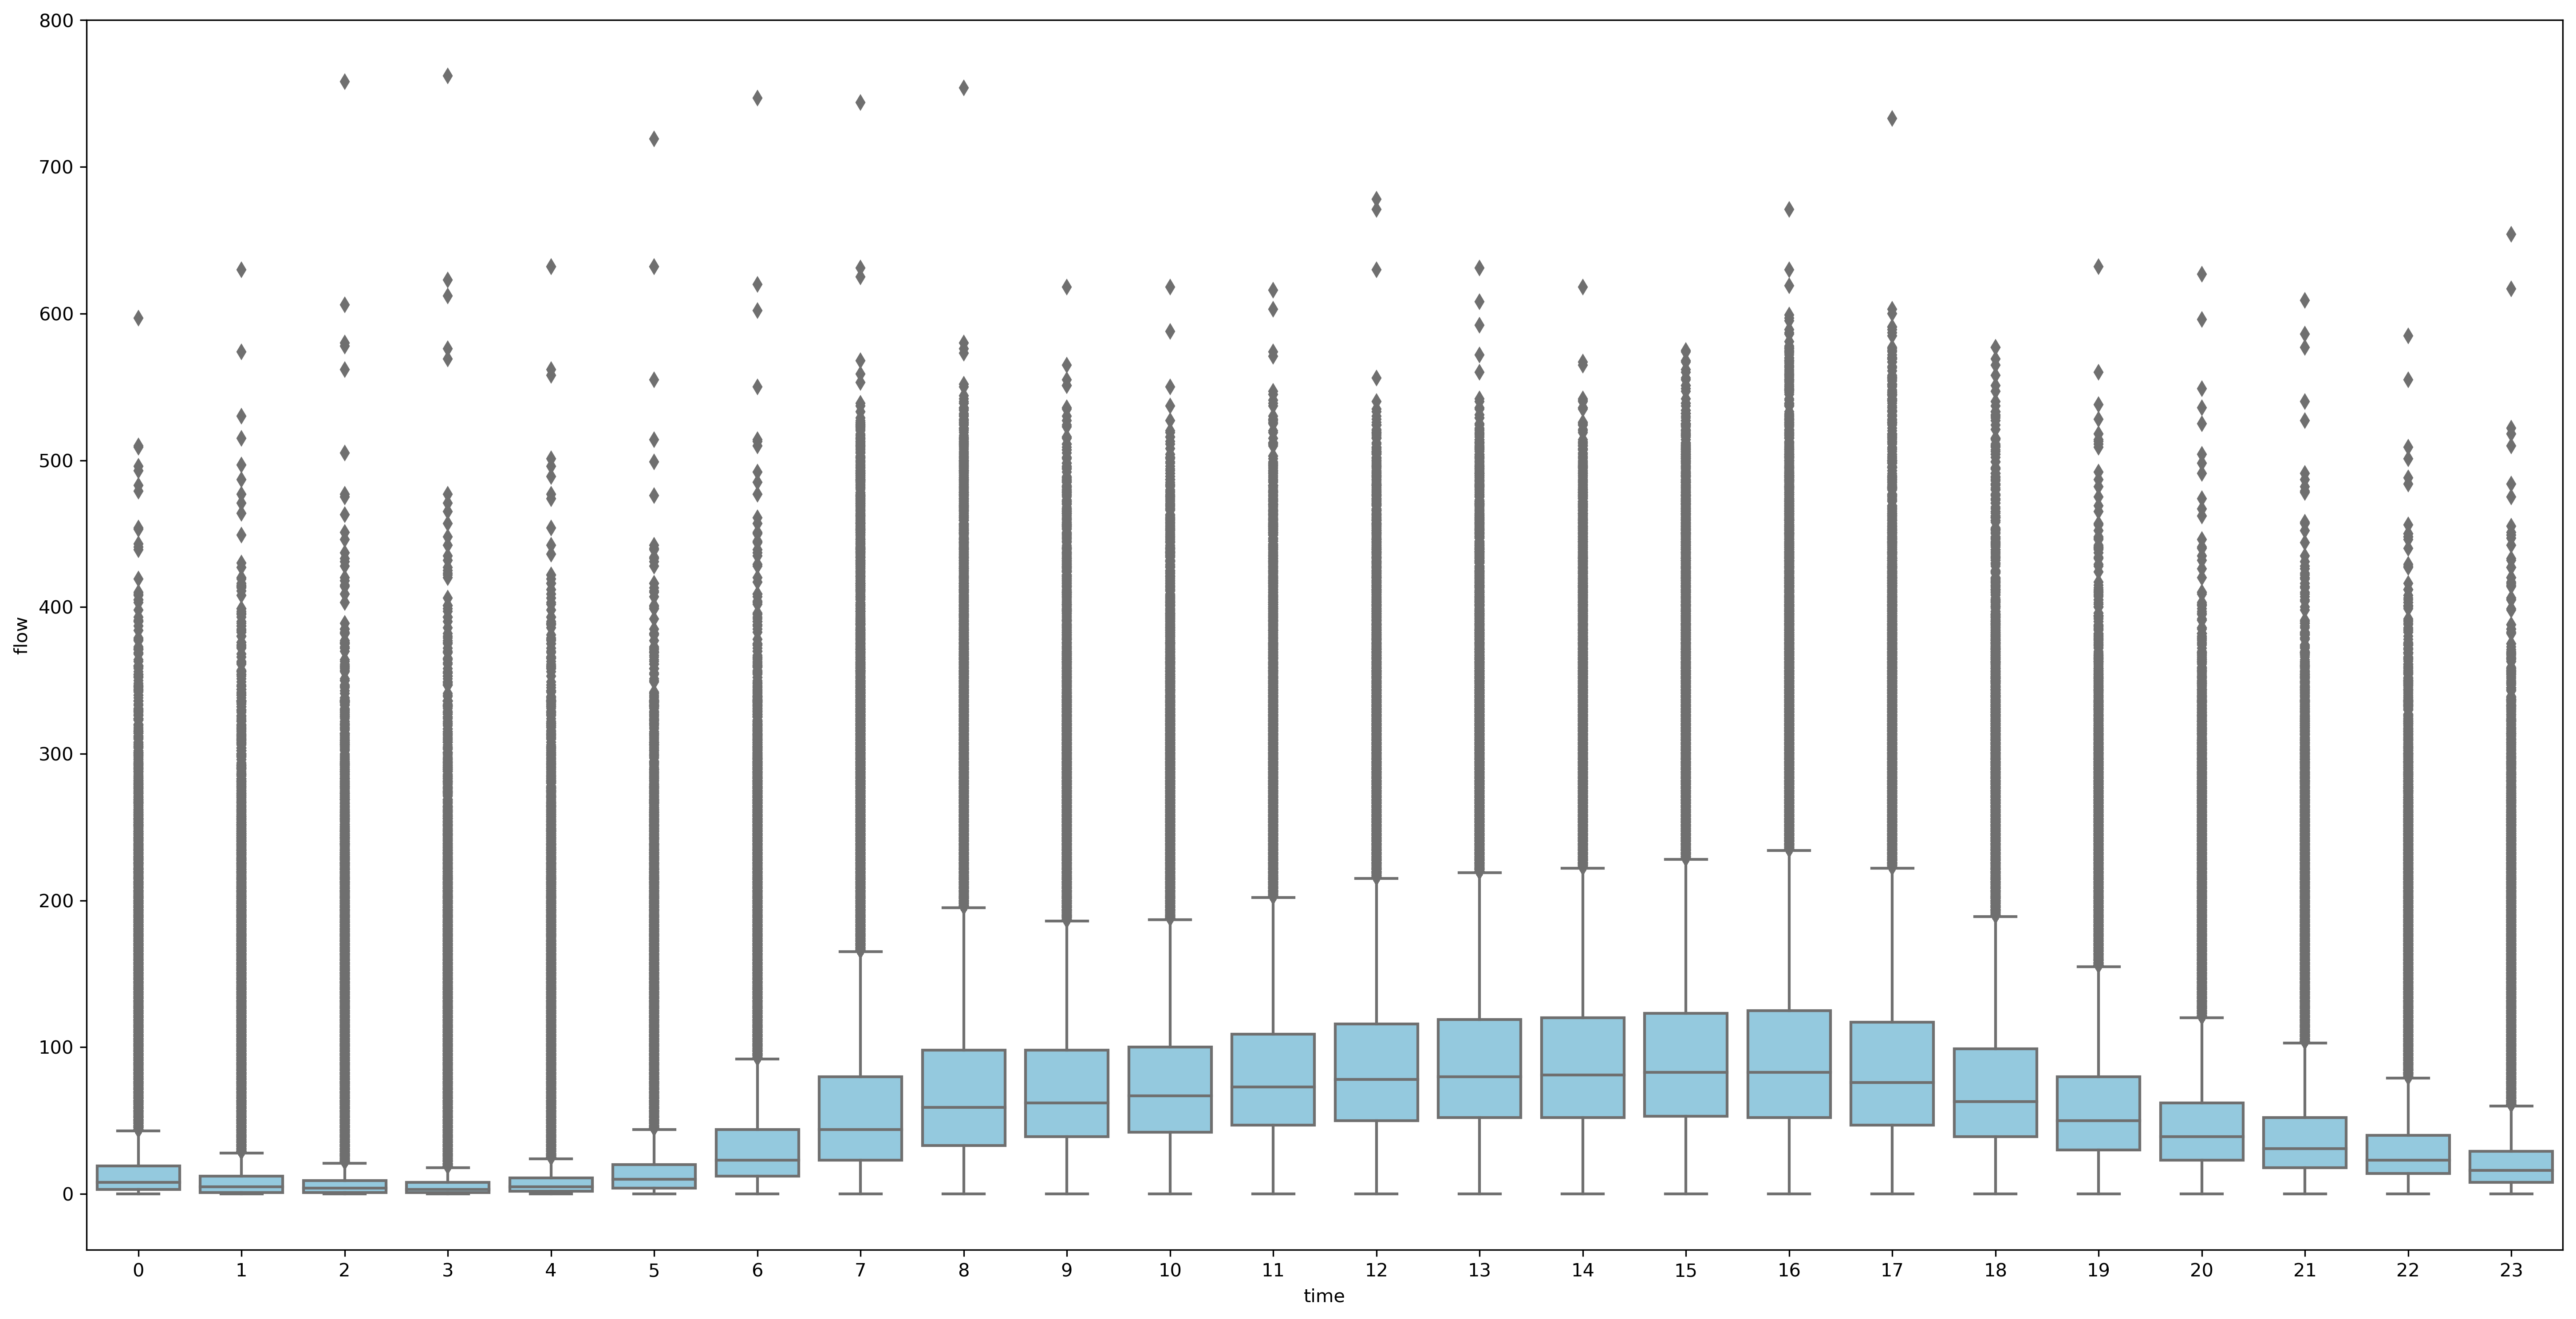

In [29]:
width=24
height=12
fig = plt.figure(figsize=(width, height), dpi=300)
sns.boxplot(data=df_plot, x='time', y='flow', color='skyblue')

<Axes: xlabel='time', ylabel='flow'>

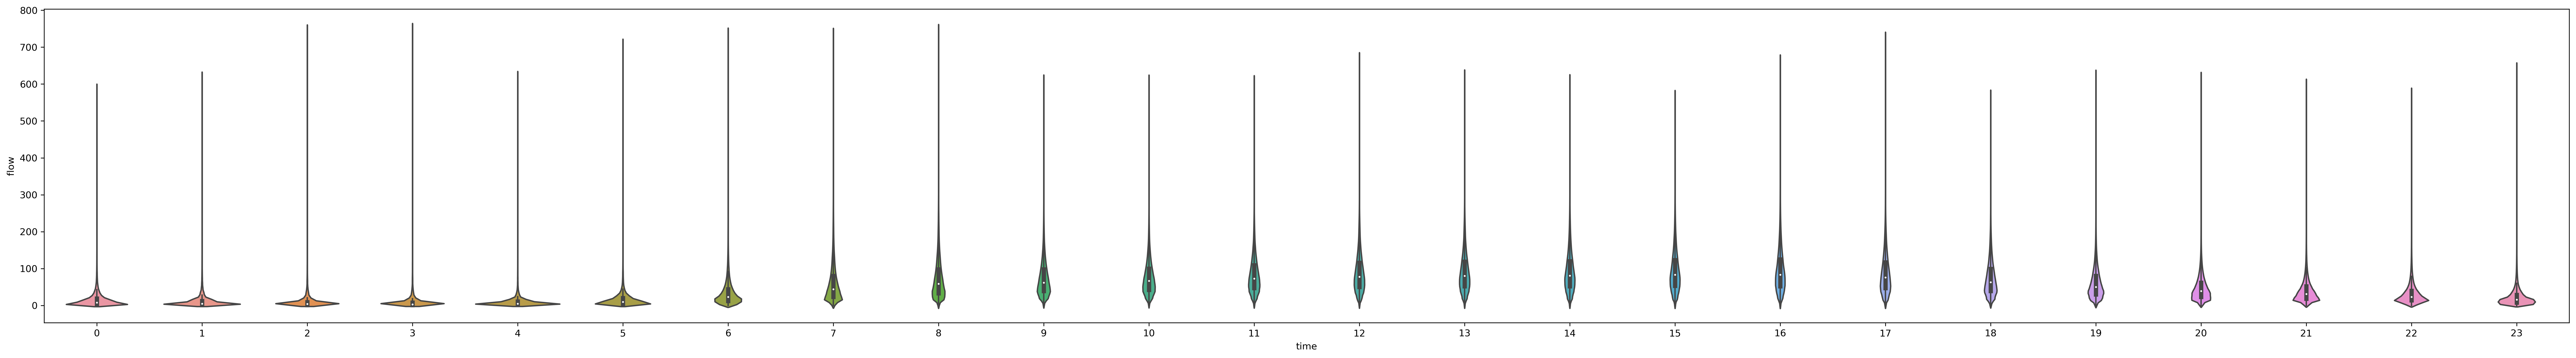

In [45]:
plt.rcParams['figure.figsize'] = [48, 6]
plt.rcParams['figure.dpi'] = 300
sns.violinplot(x ="time", y ="flow", data = df_plot)

#### Plot via pandas

<Axes: title={'center': 'flow'}, xlabel='time'>

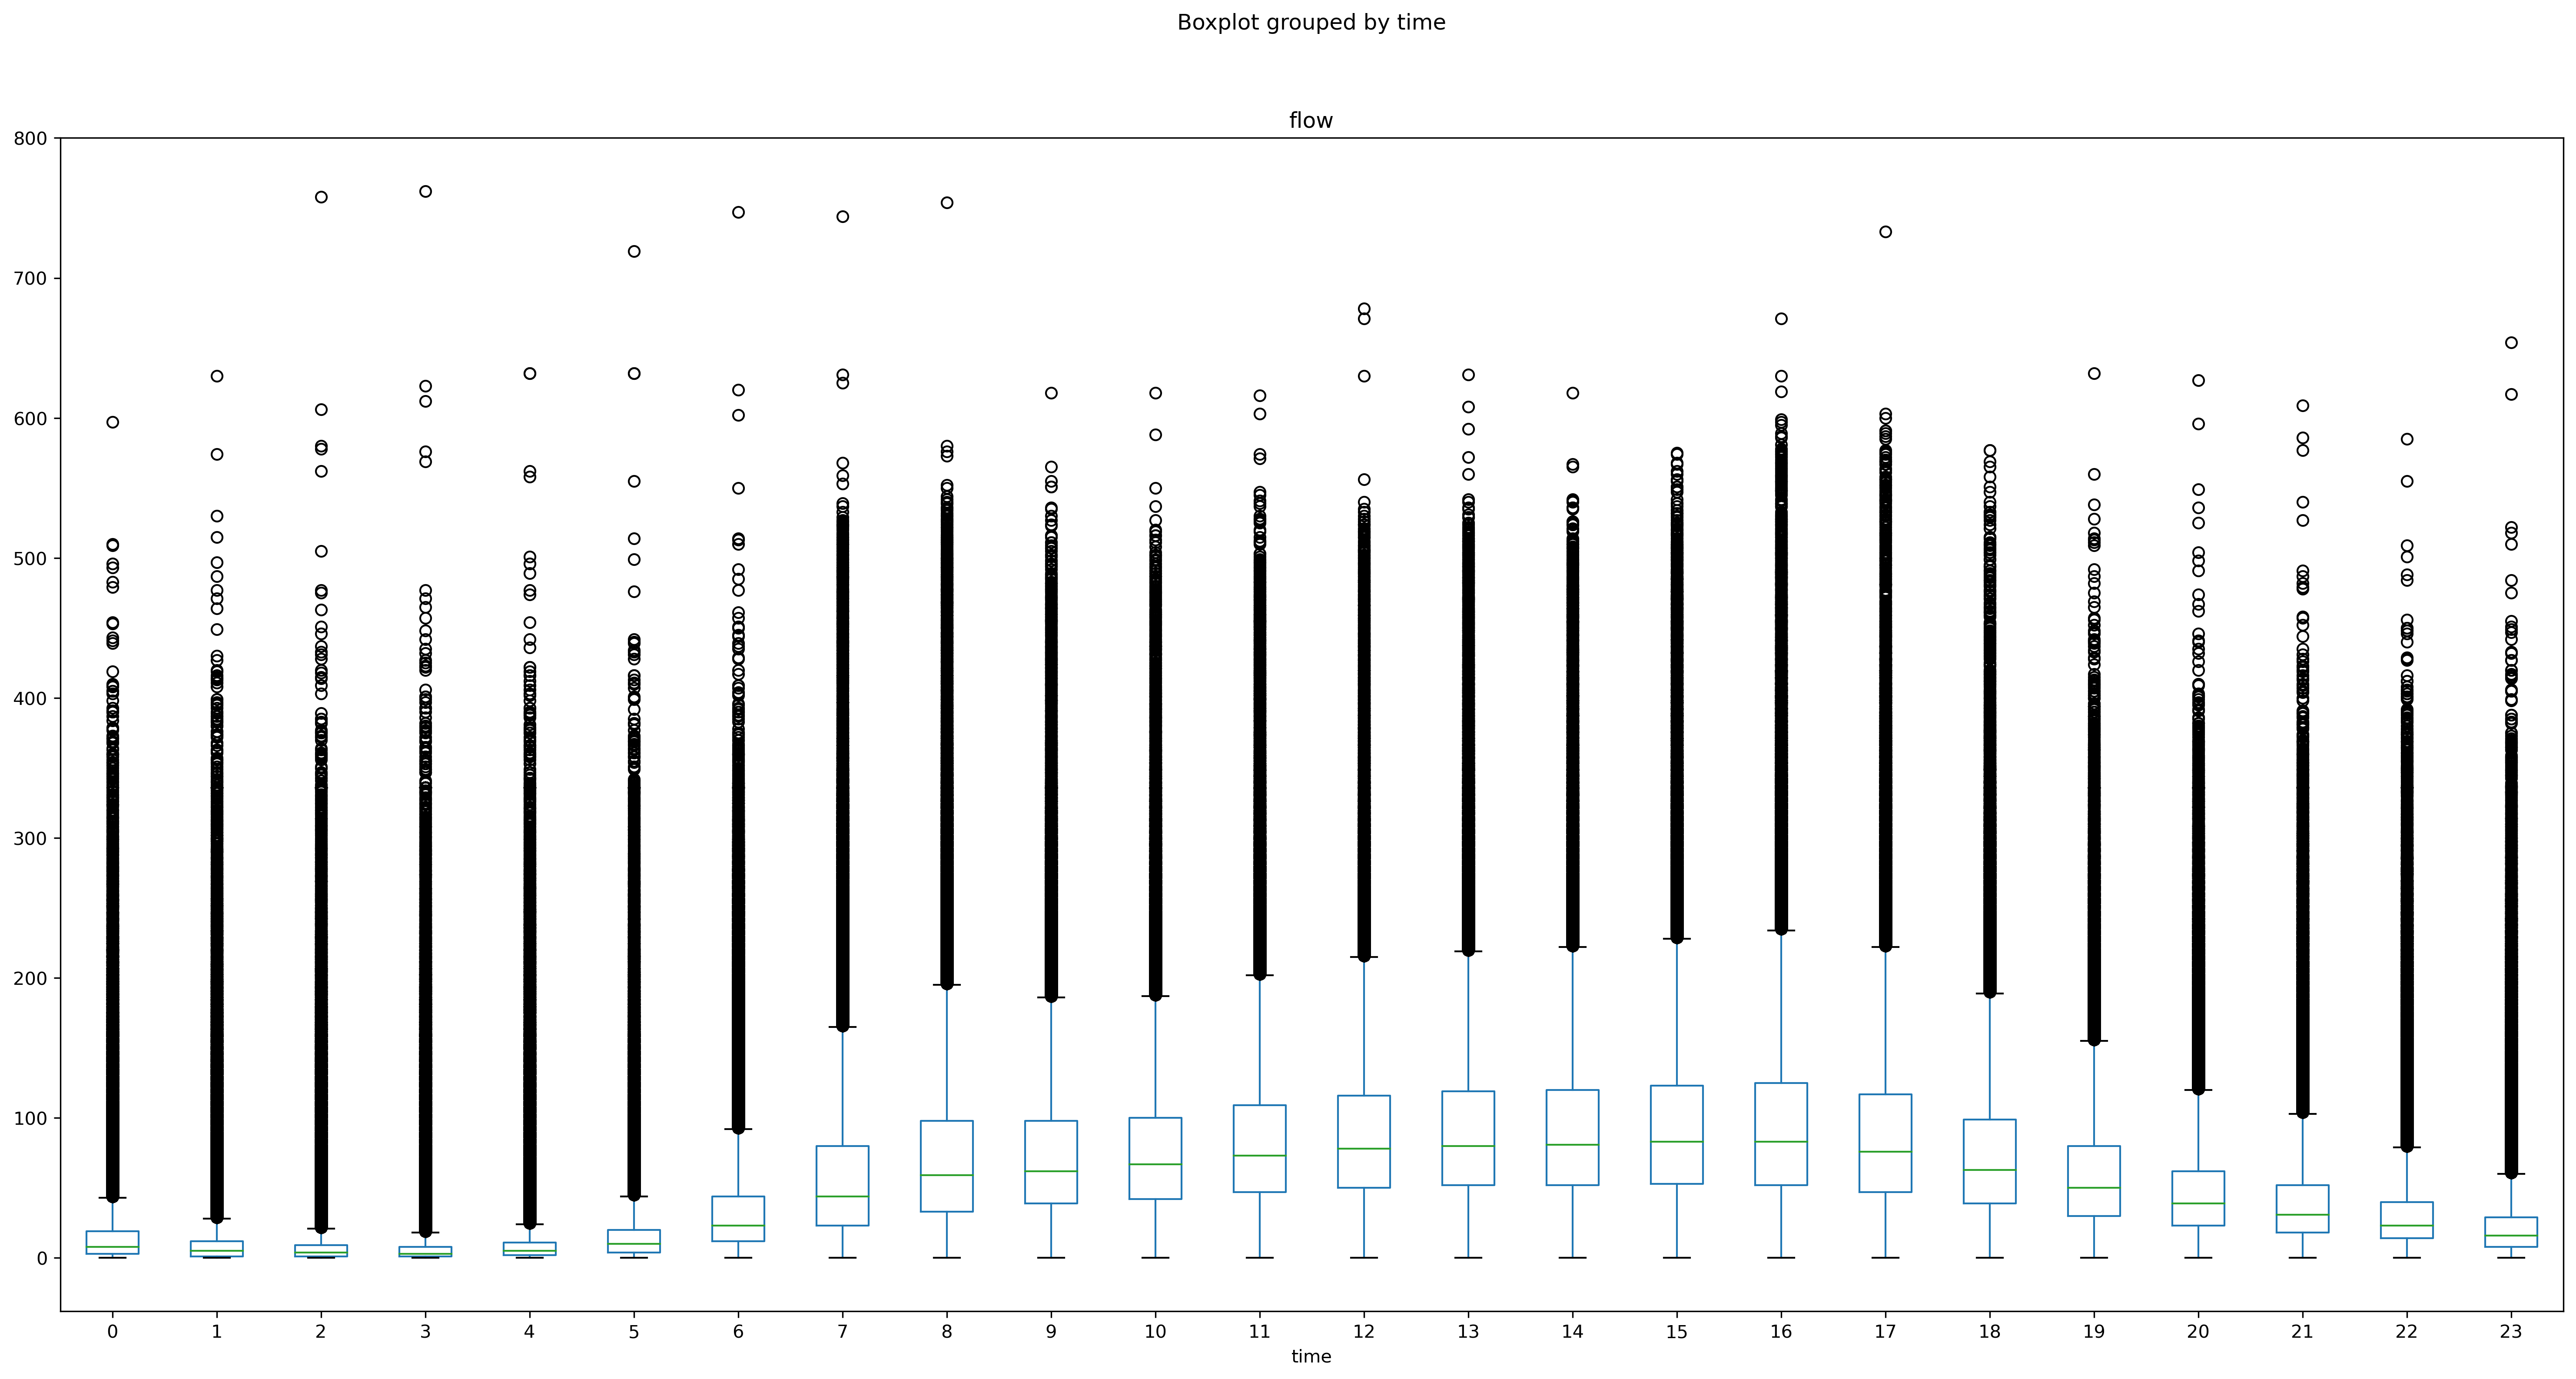

In [36]:
plt.rcParams["figure.dpi"] = 300
df_plot.boxplot(by ='time', column =['flow'], figsize=(24,12), grid = False)

In [66]:
vio_plot_data = []
for hour in df_plot['time'].unique():
    data = df_plot.loc[df_plot.time == hour, 'flow'].values
    vio_plot_data.append(data)

{'bodies': [<matplotlib.collections.PolyCollection at 0x18a6308f890>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x18a63356e50>,
 'cmins': <matplotlib.collections.LineCollection at 0x18a632c6910>,
 'cbars': <matplotlib.collections.LineCollection at 0x18a633486d0>}

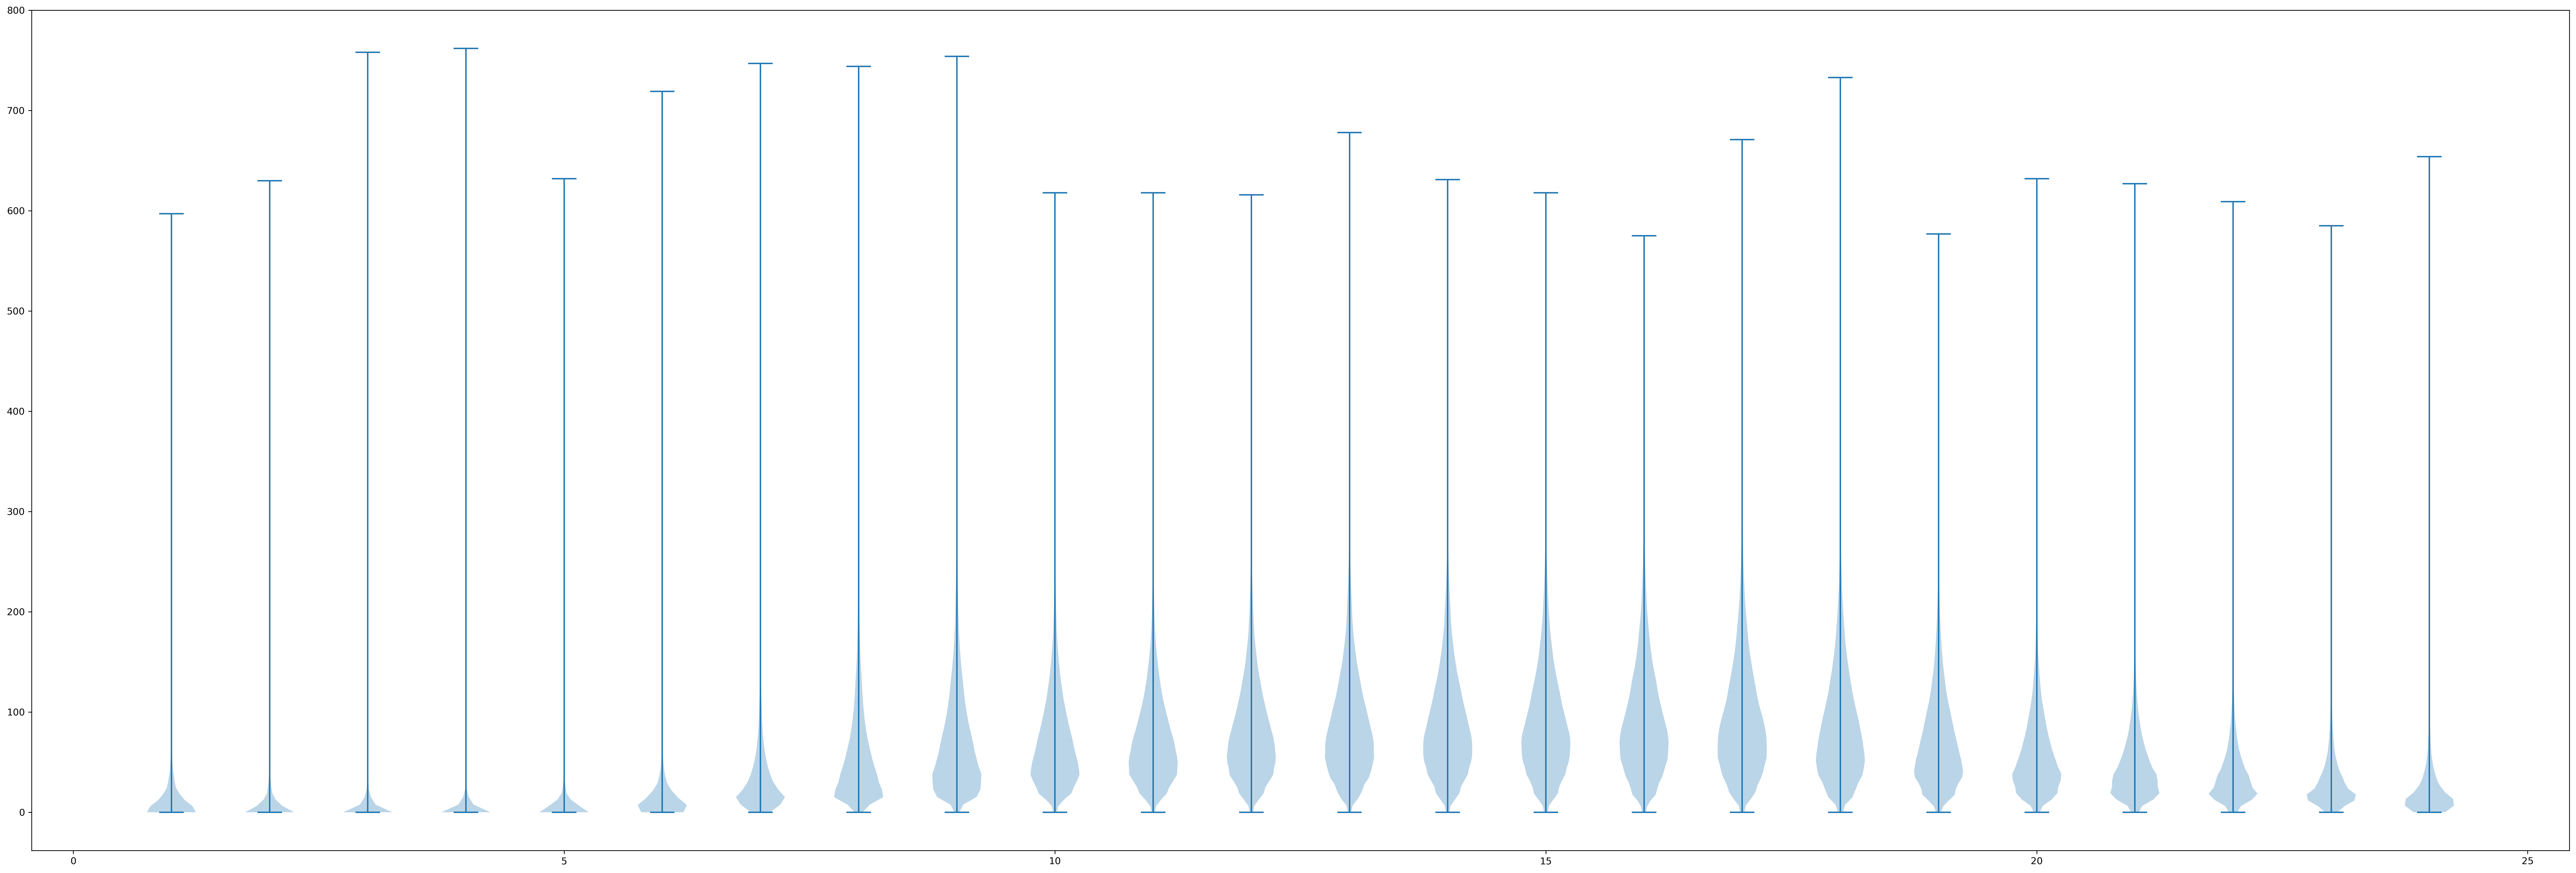

In [67]:
plt.rcParams['figure.figsize'] = [48, 16]
plt.rcParams['figure.dpi'] = 300
plt.violinplot(dataset = vio_plot_data)

### How about heatmap?